# Examine the piecewise flat instantaneous (overnight, or ON) forward rate discount curve

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from financepy.utils import *
from financepy.products.rates import *
from financepy.market.curves import *
from financepy.market.curves.discount_curve_pwf_onf import DiscountCurvePWFONF
from financepy.market.curves.composite_discount_curve import CompositeDiscountCurve

In [4]:
valuation_date = Date(1, 1, 2015)

We have a vector of dates and on fwd rates

In [5]:
knot_dts = [Date(1, 1, 2015), Date(1, 6, 2016), Date(1, 12, 2017), Date(1, 4, 2018), Date(1, 8, 2019)]
knot_years = [DayCount(DayCountTypes.SIMPLE).year_frac(valuation_date, d)[0] for d in knot_dts]
ondfwd_rates = [0, 0.02, 0.04, 0.06, 0.08]
disc_curve = DiscountCurvePWFONF(valuation_date, knot_dts, ondfwd_rates)

In [6]:
print(disc_curve)

OBJECT TYPE: DiscountCurvePWFONF
DATE: ONWD RATE
01-JAN-2015: 0.0
01-JUN-2016: 0.02
01-DEC-2017: 0.04
01-APR-2018: 0.06
01-AUG-2019: 0.08
FREQUENCY: FrequencyTypes.CONTINUOUS



In [7]:
for dt in knot_dts:
    df = disc_curve.df(dt)
    print(dt, df)

01-JAN-2015 [1.]
01-JUN-2016 [0.97209085]
01-DEC-2017 [0.91551002]
01-APR-2018 [0.89752923]
01-AUG-2019 [0.80670718]


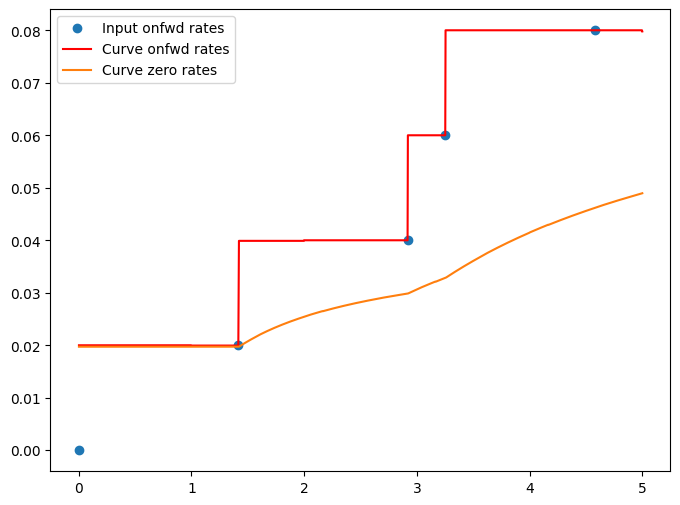

In [8]:
tInterpValues = np.linspace(1/365, 5.0, int(5*365))
interpDates = valuation_date.add_years(tInterpValues)
fwdInterpValues = disc_curve.fwd(interpDates)
zerosInterpValues = disc_curve.zero_rate(interpDates)


plt.figure(figsize=(8, 6))
plt.plot(knot_years, ondfwd_rates, 'o', label="Input onfwd rates")
plt.plot(tInterpValues, fwdInterpValues, color='r', label="Curve onfwd rates")
plt.plot(tInterpValues, zerosInterpValues, label="Curve zero rates")
plt.legend(loc = 'best')
plt.show()

### Create a bump curve and apply to the base curve

First create a bump

In [9]:
bump_dates = [Date(1, 6, 2017), Date(1, 6, 2018), Date(2, 6, 2018)]
# bump_years = [DayCount(DayCountTypes.SIMPLE).year_frac(valuation_date, d)[0] for d in bump_dates]
bump_onfwd_rates = [0.0, 0.01, 0.00]
bump_curve = DiscountCurvePWFONF(valuation_date, bump_dates, bump_onfwd_rates)

Next apply the bump

In [10]:
bumped_curve = CompositeDiscountCurve([disc_curve, bump_curve])

Now plot base and bumped

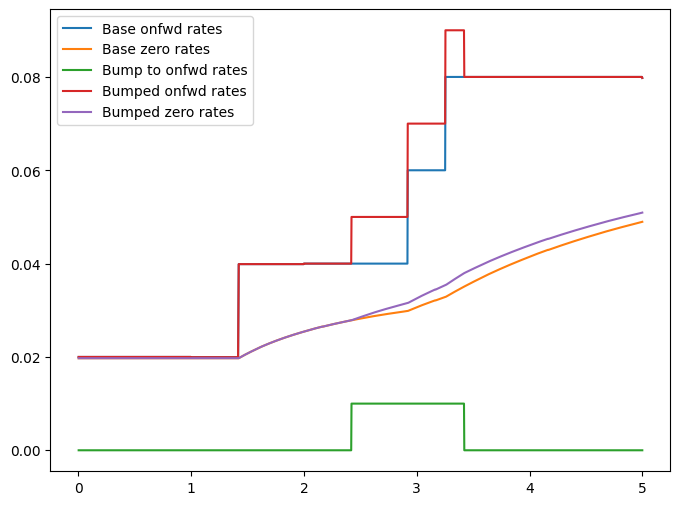

In [11]:
tInterpValues = np.linspace(1/365, 5.0, int(5*365))
interpDates = valuation_date.add_years(tInterpValues)
base_onfwd_rates = disc_curve.fwd(interpDates)
base_zero_rates = disc_curve.zero_rate(interpDates)

bump_onfwd_rates = bump_curve.fwd(interpDates)

bumped_onfwd_rates = bumped_curve.fwd(interpDates)
bumped_zero_rates = bumped_curve.zero_rate(interpDates)

plt.figure(figsize=(8, 6))
plt.plot(tInterpValues, base_onfwd_rates, label="Base onfwd rates")
plt.plot(tInterpValues, base_zero_rates, label="Base zero rates")

plt.plot(tInterpValues, bump_onfwd_rates, label="Bump to onfwd rates")
plt.plot(tInterpValues, bumped_onfwd_rates, label="Bumped onfwd rates")
plt.plot(tInterpValues, bumped_zero_rates, label="Bumped zero rates")

plt.legend(loc = 'best')
plt.show()